In [97]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat # Not entirely sure how to import the raw .mat data
from mne_connectivity import spectral_connectivity_time
from mne_connectivity.viz import plot_sensors_connectivity

mat_data = loadmat("Matlab Files/608_Depression_REST.mat")

In [2]:
eeg_signal = mat_data['EEG']['data'][0,0]

sampling_rate =  mat_data['EEG']['srate'][0,0][0,0]

chanlocs = mat_data['EEG']['chanlocs'][0,0]
channel_names = [str(chan[0]) for chan in chanlocs['labels'][0]]

In [3]:
mat_data['EEG'].dtype.names

('setname',
 'filename',
 'filepath',
 'subject',
 'group',
 'condition',
 'session',
 'comments',
 'nbchan',
 'trials',
 'pnts',
 'srate',
 'xmin',
 'xmax',
 'times',
 'data',
 'icaact',
 'icawinv',
 'icasphere',
 'icaweights',
 'icachansind',
 'chanlocs',
 'urchanlocs',
 'chaninfo',
 'ref',
 'event',
 'urevent',
 'eventdescription',
 'epoch',
 'epochdescription',
 'reject',
 'stats',
 'specdata',
 'specicaact',
 'splinefile',
 'icasplinefile',
 'dipfit',
 'history',
 'saved',
 'etc')

In [4]:
channel_names

['FP1',
 'FPZ',
 'FP2',
 'AF3',
 'AF4',
 'F7',
 'F5',
 'F3',
 'F1',
 'FZ',
 'F2',
 'F4',
 'F6',
 'F8',
 'FT7',
 'FC5',
 'FC3',
 'FC1',
 'FCZ',
 'FC2',
 'FC4',
 'FC6',
 'FT8',
 'T7',
 'C5',
 'C3',
 'C1',
 'CZ',
 'C2',
 'C4',
 'C6',
 'T8',
 'M1',
 'TP7',
 'CP5',
 'CP3',
 'CP1',
 'CPZ',
 'CP2',
 'CP4',
 'CP6',
 'TP8',
 'M2',
 'P7',
 'P5',
 'P3',
 'P1',
 'PZ',
 'P2',
 'P4',
 'P6',
 'P8',
 'PO7',
 'PO5',
 'PO3',
 'POZ',
 'PO4',
 'PO6',
 'PO8',
 'CB1',
 'O1',
 'OZ',
 'O2',
 'CB2',
 'HEOG',
 'VEOG',
 'EKG']

In [5]:
info = mne.create_info(ch_names=channel_names, sfreq=sampling_rate, ch_types=['eeg']*59+['misc']+['eeg']*3+['misc']+['eog']*2+['ecg'])

In [6]:
info.set_montage("standard_1020", match_case=False, on_missing='warn')

<Info | 8 non-empty values
 bads: []
 ch_names: FP1, FPZ, FP2, AF3, AF4, F7, F5, F3, F1, FZ, F2, F4, F6, F8, ...
 chs: 62 EEG, 2 misc, 2 EOG, 1 ECG
 custom_ref_applied: False
 dig: 65 items (3 Cardinal, 62 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 67
 projs: []
 sfreq: 500.0 Hz
>

In [7]:
raw = mne.io.RawArray(eeg_signal, info)

Creating RawArray with float64 data, n_channels=67, n_times=248480
    Range : 0 ... 248479 =      0.000 ...   496.958 secs
Ready.


raw.plot(scalings='auto')

In [207]:
# Let's work with theta data for now

filtered_data = raw.copy().filter(l_freq=4, h_freq=8)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 825 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


In [209]:
filtered_data

<RawArray | 67 x 248480 (497.0 s), ~127.1 MB, data loaded>

In [211]:
filtered_data.plot(scalings='auto')

In [212]:
eeg_filtered = filtered_data.copy().pick('eeg')

In [215]:
eeg_filtered.plot(scalings='auto')

In [217]:
ica=mne.preprocessing.ICA(n_components=0.99, max_iter='auto', random_state=42)
ica.fit(eeg_filtered)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by explained variance: 12 components
Fitting ICA took 3.0s.


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,42 iterations on raw data (248480 samples)
ICA components,12
Available PCA components,62
Channel types,eeg
ICA components marked for exclusion,—


In [201]:
print(ica.get_explained_variance_ratio(filtered_data))
ica.plot_sources(filtered_data)

{'eeg': 0.9876380961481015}
Creating RawArray with float64 data, n_channels=15, n_times=248480
    Range : 0 ... 248479 =      0.000 ...   496.958 secs
Ready.


In [219]:
ica.find_bads_ecg(filtered_data, ch_name='EKG')

Using threshold: 0.23 for CTPS ECG detection
Using channel EKG to identify heart beats.
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5000 samples (10.000 s)

Number of ECG events detected : 723 (average pulse 87.29072762395364 / min.)
Not setting metadata
723 matching events found
No baseline correction applied
Using data from preloaded Raw for 723 events and 501 original time points ...
1 bad epochs dropped


([6],
 array([0.0367219 , 0.04260272, 0.03816128, 0.03054722, 0.02956437,
        0.03592645, 0.7117889 , 0.04082642, 0.03046877, 0.02937597,
        0.04330377, 0.03016949]))

In [221]:
ica.find_bads_eog(filtered_data, ch_name='HEOG')

Using EOG channel: HEOG
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
-

([0],
 array([ 0.52093174, -0.02753753,  0.00374599, -0.03680997, -0.01225673,
        -0.03360322, -0.01398265, -0.00326985,  0.06119235,  0.00310983,
        -0.01118655,  0.00490502]))

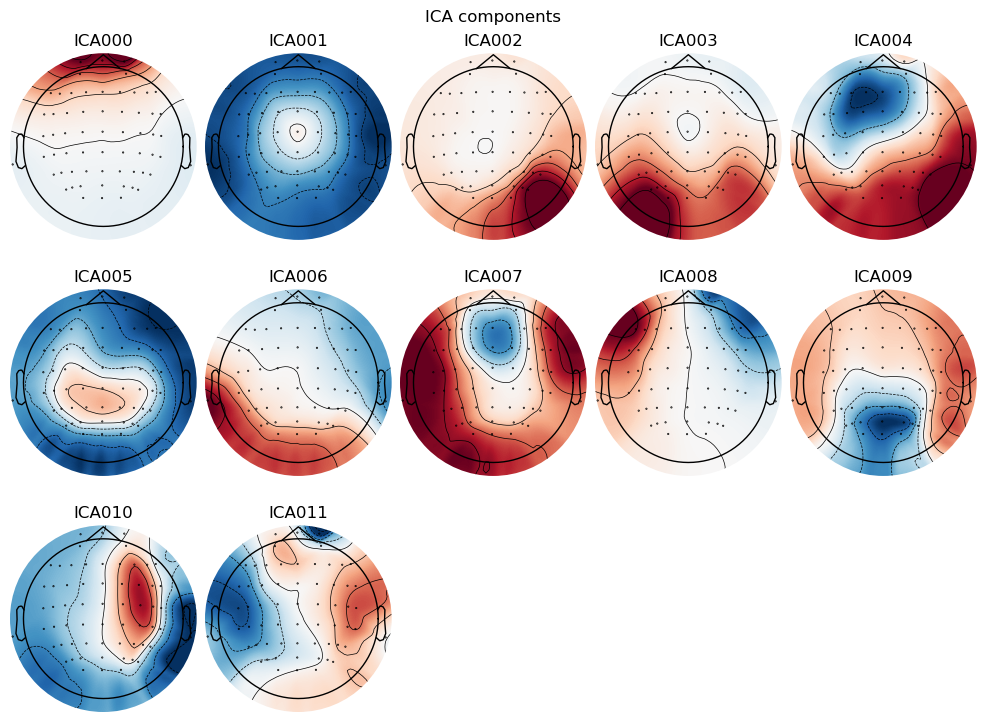

In [223]:
ica.plot_components();

Using EOG channel: EKG
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- 

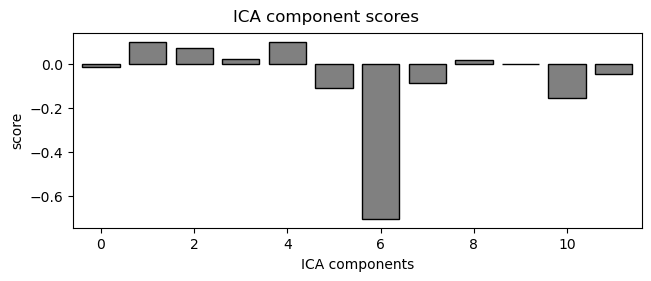

In [225]:
ekg_indices, ekg_scores = ica.find_bads_eog(filtered_data, ch_name = 'EKG');
print(ekg_indices)
ica.plot_scores(ekg_scores);

Using EOG channels: HEOG, VEOG
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.2

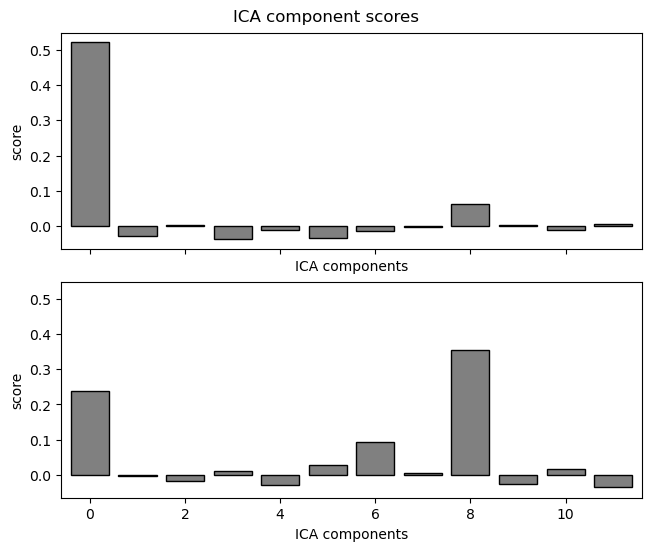

In [227]:
eog_indices, eog_scores = ica.find_bads_eog(filtered_data, ch_name = ['HEOG', 'VEOG']);
print(eog_indices)
ica.plot_scores(eog_scores);

In [229]:
ica.exclude=[0,8,6]

In [231]:
filtered_data_clean = ica.apply(filtered_data)

Applying ICA to Raw instance
    Transforming to ICA space (12 components)
    Zeroing out 3 ICA components
    Projecting back using 62 PCA components


In [233]:
filtered_data_clean.plot(scalings='auto')

In [249]:
epochs = mne.make_fixed_length_epochs(filtered_data_clean, duration=5)
eeg_epochs = epochs.load_data().copy().pick('eeg')

Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 99 events and 2500 original time points ...
0 bad epochs dropped


In [259]:
min_freq = 4
max_freq = 8
freqs = np.linspace(min_freq, max_freq, 3)
con_time = spectral_connectivity_time(eeg_epochs, freqs, method='wpli', average=True,mode='multitaper', n_cycles=freqs/2, fmin=min_freq, fmax=max_freq)

Replacing existing metadata with 3 columns
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 99 ...
   Processing epoch 2 / 99 ...
   Processing epoch 3 / 99 ...
   Processing epoch 4 / 99 ...
   Processing epoch 5 / 99 ...
   Processing epoch 6 / 99 ...
   Processing epoch 7 / 99 ...
   Processing epoch 8 / 99 ...
   Processing epoch 9 / 99 ...
   Processing epoch 10 / 99 ...
   Processing epoch 11 / 99 ...
   Processing epoch 12 / 99 ...
   Processing epoch 13 / 99 ...
   Processing epoch 14 / 99 ...
   Processing epoch 15 / 99 ...
   Processing epoch 16 / 99 ...
   Processing epoch 17 / 99 ...
   Processing epoch 18 / 99 ...
   Processing epoch 19 / 99 ...
   Processing epoch 20 / 99 ...
   Processing epoch 21 / 99 ...
   Processing epoch 22 / 99 ...
   Processing epoch 23 / 99 ...
   Processing epoch 24 / 99 ...
   Processing epoch 25 / 99 ...
   Processing epoch 26 / 99 ...
   Processing epoch 27 / 99 ...
   Processing epoch 28 / 99

In [253]:
con_time_data = con_time.get_data(output='dense')

In [255]:
con_time_data.shape

(62, 62, 10)

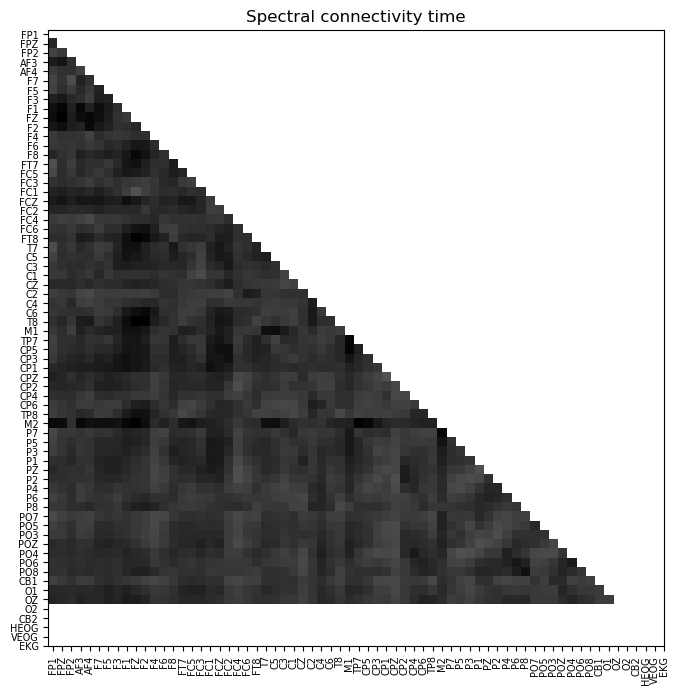

In [257]:
plt.figure(figsize=(8,8))

# if con_time contains 3 data for each freq range of interest: con_plot = plt.imshow(con_time_array[:,:,2], cmap='binary')
con_plot = plt.imshow(np.mean(con_time_data, axis=2), cmap='binary')
plt.title('Spectral connectivity time')
plt.xticks(range(len(channel_names)), channel_names, fontsize=7, rotation=90)
plt.yticks(range(len(channel_names)), channel_names, fontsize=7)

plt.show();

In [137]:
plot_sensors_connectivity(epochs.info, np.mean(con_time_data, axis=2))

In [143]:
from mne.minimum_norm import apply_inverse_epochs, make_inverse_operator
from mne.viz import circular_layout
from mne 

In [181]:
mne.datasets.fetch_fsaverage()

0 files missing from root.txt in C:\Users\fmava\Downloads\EEG Learning\MDD Dataset Practice
0 files missing from bem.txt in C:\Users\fmava\Downloads\EEG Learning\MDD Dataset Practice\fsaverage


MNEWindowsPath('C:/Users/fmava/Downloads/EEG Learning/MDD Dataset Practice/fsaverage')

In [173]:
# set up sample source space
src = mne.setup_source_space(subject='fsaverage', spacing='oct6', add_dist=False, subjects_dir=r'C:\Users\fmava\Downloads\EEG Learning\MDD Dataset Practice')

Setting up the source space with the following parameters:

SUBJECTS_DIR = C:\Users\fmava\Downloads\EEG Learning\MDD Dataset Practice
Subject      = fsaverage
Surface      = white
Octahedron subdivision grade 6

>>> 1. Creating the source space...

Doing the octahedral vertex picking...
Loading C:\Users\fmava\Downloads\EEG Learning\MDD Dataset Practice\fsaverage\surf\lh.white...
Mapping lh fsaverage -> oct (6) ...
    Triangle neighbors and vertex normals...
Loading geometry from C:\Users\fmava\Downloads\EEG Learning\MDD Dataset Practice\fsaverage\surf\lh.sphere...
Setting up the triangulation for the decimated surface...
loaded lh.white 4098/163842 selected to source space (oct = 6)

Loading C:\Users\fmava\Downloads\EEG Learning\MDD Dataset Practice\fsaverage\surf\rh.white...
Mapping rh fsaverage -> oct (6) ...
    Triangle neighbors and vertex normals...
Loading geometry from C:\Users\fmava\Downloads\EEG Learning\MDD Dataset Practice\fsaverage\surf\rh.sphere...
Setting up the triangu

In [179]:
bem_model = mne.make_bem_model(subject='fsaverage', subjects_dir=r'C:\Users\fmava\Downloads\EEG Learning\MDD Dataset Practice')

Creating the BEM geometry...
Going from 5th to 4th subdivision of an icosahedron (n_tri: 20480 -> 5120)
Going from 5th to 4th subdivision of an icosahedron (n_tri: 20480 -> 5120)
Going from 5th to 4th subdivision of an icosahedron (n_tri: 20480 -> 5120)
outer skin  CM is  -0.21 -19.38  -0.23 mm
outer skull CM is  -0.19 -19.34  -0.49 mm
inner skull CM is  -0.53 -21.10   6.21 mm
Checking that surface outer skull is inside surface outer skin  ...


RuntimeError: Surface outer skull is not completely inside surface outer skin 

In [175]:
# setup BEM model and BEM solution for fsaverage

forward_solution = mne.make_forward_solution(filtered_data_clean.info, 'fsaverage', src,


Creating the BEM geometry...
Going from 5th to 4th subdivision of an icosahedron (n_tri: 20480 -> 5120)
Going from 5th to 4th subdivision of an icosahedron (n_tri: 20480 -> 5120)
Going from 5th to 4th subdivision of an icosahedron (n_tri: 20480 -> 5120)
outer skin  CM is  -0.21 -19.38  -0.23 mm
outer skull CM is  -0.19 -19.34  -0.49 mm
inner skull CM is  -0.53 -21.10   6.21 mm
Checking that surface outer skull is inside surface outer skin  ...


RuntimeError: Surface outer skull is not completely inside surface outer skin 

In [ ]:
regions_of_interest = ['ctx-lh-superiorfrontal', 'ctx-lh-rostralmiddlefrontal', 'ctx-lh-caudalmiddlefrontal', 
                       'ctx-lh-parsopercularis', 'ctx-lh-parsobitalis', 'ctx-lh-parstriangularis',
                      'ctx-rh-superiorfrontal', 'ctx-rh-rostralmiddlefrontal', 'ctx-rh-caudalmiddlefrontal', 
                       'ctx-rh-parsopercularis', 'ctx-rh-parsobitalis', 'ctx-rh-parstriangularis',
                       'ctx-lh-superiorparietal', 'ctx-lh-inferiorparietal', 'ctx-lh-precuneus', 'ctx-lh-postcentral',
                       'ctx-rh-superiorparietal', 'ctx-rh-inferiorparietal', 'ctx-rh-precuneus', 'ctx-rh-postcentral'
                      ]                